# 线性回归算法


+ 线性回归结果一般为连续性数据，逻辑回归结果一般为二分类数据
+ 梯度下降：梯度下降就是当得到目标函数之后，不断对函数进行优化，可分成2个步骤，一是找到前行目标的方向，二是前行一小步后，调整前行的方向

## os.sep
python是跨平台的。在Windows上，文件的路径分隔符是'\'，在Linux上是'/'。    
为了让代码在不同的平台上都能运行，那么路径应该写'\'还是'/'呢？   
使用os.sep的话，就不用考虑这个了，os.sep根据你所处的平台，自动采用相应的分隔符号。

举例  
Linux下一个路径，/usr/share/python,那么上面的os.sep就是‘/’   
windows下一个路径，C：\Users\Public\Desktop,那么上面的os.sep就是‘\’.   
data_dir = os.sep.join(['hello', 'world'])    

---------------------------------------------------------------------------------------------------------------------------------------

## 线性回归得出来连续性数据，找到一个合适的线或者面尽可能多的拟合数据
+ 系数称为权重项
+ 常数称为偏置项，微调结果值，用于矩阵时，会用1进行补位

## 误差
+ 误差是真实值与预测值之间存在的差异
+ 误差是独立并且具有相同的分布，并且服从均值为0方差为θ平方的高斯分布  
注：拿到数据先进行随机打乱数据

![微信截图_20200330205446.png](https://i.loli.net/2020/03/30/tiw1bX94IAlRCmQ.png)

## 似然函数
+ 似然函数的解释：什么样的参数跟我们的数据组合后恰好是真实值
+ 对数似然的解释：乘法难解，加法就容易了，对数里面乘法可以转换成加法

## 梯度下降
梯度下降就是当得到目标函数之后，不断对函数进行优化，可分成2个步骤，一是找到前行目标的方向，二是前行一小步后，调整前行的方向

![微信截图_20200330211706.png](https://i.loli.net/2020/03/30/unDiFWEgYcGbpwo.png)

![微信截图_20200330211902.png](https://i.loli.net/2020/03/30/b8dWaqosjhYuM5F.png)

## 逻辑回归
+ 逻辑回归是分类的算法，经典的二分类算法 
+ 逻辑回归思想先用简单的再用复杂的，能用简单的就用简单的
+ 逻辑回归可用于多分类，softmax
+ 逻辑回归可解释性强

![微信截图_20200330213412.png](https://i.loli.net/2020/03/30/GMmwYvTSL2Xykdl.png)

# Logistic Regression

## The data 
我们将建立一个逻辑回归模型来预测一个学生是否被大学录取。假设你是一个大学系的管理员，你想根据两次考试的结果来决定每个申请人的录取机会。你有以前的申请人的历史数据，你可以用它作为逻辑回归的训练集。对于每一个培训例子，你有两个考试的申请人的分数和录取决定。为了做到这一点，我们将建立一个分类模型，根据考试成绩估计入学概率。

In [1]:
# 三大件
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
# 读取数据
import os
path =r'D:\001  学习文件\001  学习笔记\020  唐宇迪机器学习实战_20200326\机器学习文件\010  Python实现逻辑回归与梯度下降\data\LogiReg_data.txt'
pdData = pd.read_csv(path, header = None, names = ['Exam 1','Exam 2','Admitted'])
pdData.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [16]:
pdData.shape

(100, 3)

Text(0, 0.5, 'Exam 2 Score')

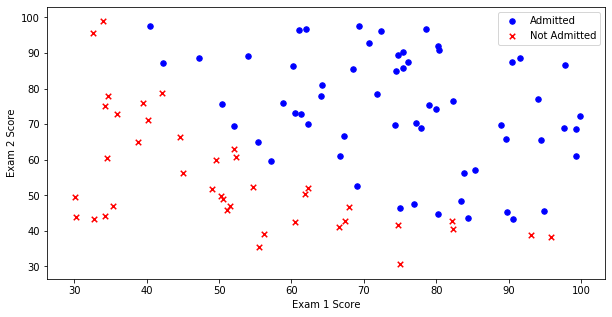

In [19]:
# 把1，0指定正例、负例
positive = pdData[pdData['Admitted'] == 1] # 数据集只要已录取的数据
negative = pdData[pdData['Admitted'] == 0]

# 画图
fig, ax = plt.subplots(figsize=(10,5)) # 画图区域大小
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=30, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=30, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

## The logistic regression
目标：建立分类器（求解出三个参数 $\theta_0         \theta_1         \theta_2 $）

设定阈值，根据阈值判断录取结果

### 要完成的模块
-  `sigmoid` : 映射到概率的函数

-  `model` : 返回预测结果值

-  `cost` : 根据参数计算损失

-  `gradient` : 计算每个参数的梯度方向

-  `descent` : 进行参数更新

-  `accuracy`: 计算精度

###  `sigmoid` 函数

$$
g(z) = \frac{1}{1+e^{-z}}   
$$

In [22]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

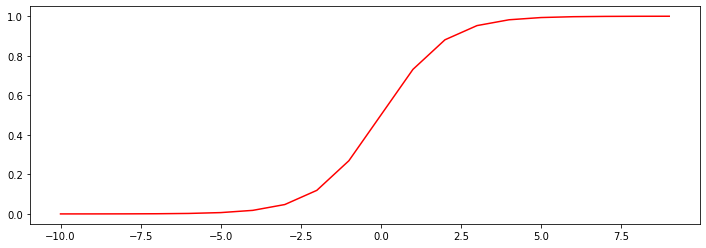

In [23]:
# 画图展示sigmoid函数
nums = np.arange(-10, 10, step=1) #creates a vector containing 20 equally spaced values from -10 to 10
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(nums, sigmoid(nums), 'r')

### Sigmoid
* $g:\mathbb{R} \to [0,1]$
* $g(0)=0.5$
* $g(- \infty)=0$
* $g(+ \infty)=1$

In [25]:
# 构造回归模型，在数据中插入一列为“1”的值，填充“常数项”的系数
def model(X, theta):
    return sigmoid(np.dot(X, theta.T))

$$
\begin{array}{ccc}
\begin{pmatrix}\theta_{0} & \theta_{1} & \theta_{2}\end{pmatrix} & \times & \begin{pmatrix}1\\
x_{1}\\
x_{2}
\end{pmatrix}\end{array}=\theta_{0}+\theta_{1}x_{1}+\theta_{2}x_{2}
$$

In [27]:
# 插入一列
pdData.insert(0,'Ones',1)

orig_data = pdData.as_matrix() # convert the Pandas representation of the data to an array useful for further computations
cols = orig_data.shape[1]
X = orig_data[:,0:cols-1]
y = orig_data[:,cols-1:cols]

# 用“0”占位创建矩阵
theta = np.zeros([1, 3])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [28]:
# 检查数据
X[:5]

array([[ 1.        , 34.62365962, 78.02469282],
       [ 1.        , 30.28671077, 43.89499752],
       [ 1.        , 35.84740877, 72.90219803],
       [ 1.        , 60.18259939, 86.3085521 ],
       [ 1.        , 79.03273605, 75.34437644]])

In [29]:
# 检查数据
y[:5]

array([[0.],
       [0.],
       [0.],
       [1.],
       [1.]])

In [30]:
# 检查数据
theta

array([[0., 0., 0.]])

In [31]:
X.shape,y.shape,theta.shape

((100, 3), (100, 1), (1, 3))

## 损失函数

将对数似然函数去负号

$$
D(h_\theta(x), y) = -y\log(h_\theta(x)) - (1-y)\log(1-h_\theta(x))
$$
求平均损失
$$
J(\theta)=\frac{1}{n}\sum_{i=1}^{n} D(h_\theta(x_i), y_i)
$$

In [32]:
def cost(X, y, theta):
    left = np.multiply(-y, np.log(model(X, theta)))
    right = np.multiply(1 - y, np.log(1 - model(X, theta)))
    return np.sum(left - right) / (len(X))

In [33]:
cost(X, y, theta)

0.6931471805599453

## 计算梯度


$$
\frac{\partial J}{\partial \theta_j}=-\frac{1}{m}\sum_{i=1}^n (y_i - h_\theta (x_i))x_{ij}
$$


In [34]:
def gradient(X, y, theta):
    grad = np.zeros(theta.shape)
    error = (model(X, theta)- y).ravel()
    for j in range(len(theta.ravel())): #for each parmeter
        term = np.multiply(error, X[:,j])
        grad[0, j] = np.sum(term) / len(X)
    
    return grad

# 后面看不懂，未完待续----82课时